In [ ]:
import numpy as np
import cvxpy as cp
from itertools import permutations,combinations,combinations_with_replacement
from itertools import product
from numpy.linalg import matrix_rank, svd, norm, eig
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import random

# Norm Function - ChannelComp Modualtion Vector for Prod function (Geometric Mean)

In [ ]:
q = 4 # number of bits
N = 2**q
M = N**2

gamma = 5
# Define your function
def func_sum(ran):
    # temp = ran[0]*ran[1]
    return  np.prod(ran)

M2 = int(M*(M-1)/2)
r = [n for n in range(N)]

Df = [ele for ele in product(r, repeat = 2)]
Rf = np.zeros(M)
for idx in range(M):
  Rf[idx] = func_sum(Df[idx])


# Generate Matrix A
A1 = np.zeros((M,N))
A2 = np.zeros((M,N))
nCount = 0
for ele in product(range(N), repeat = 2):
  A1[nCount,ele[0]] = 1
  A2[nCount, ele[1]] = 1
  nCount += 1
A = A1+ A2


# Generate Distance Matrix

dis_f = [ gamma*abs(f[0]-f[1])**2 for f in combinations(Rf,2)]
dis_A = [ np.outer(A[ele[0]]-A[ele[1]], A[ele[0]]-A[ele[1]])  for ele in combinations(range(M),2)]

L = len(dis_f)
dis_f = []
dis_A = []
nCount = 0
Counter = [ele for ele in combinations(range(M),2)]
for f in combinations(Rf,2):
  if abs(f[0]-f[1])!=0:
    temp_f = gamma*abs(f[0]-f[1])**2
    dis_f.append(temp_f)
    ele = Counter[nCount]
    temp_A = np.outer(A[ele[0]]-A[ele[1]],A[ele[0]]-A[ele[1]])
    dis_A.append(temp_A)
  nCount = nCount +1
L = len(dis_f)

Now, finding the the Modualtion vector for ChannelComp method for $q=4$ and $K=4$.  

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Jul 19 12:48:59 PM: Your problem has 256 variables, 31936 constraints, and 0 parameters.
(CVXPY) Jul 19 12:49:01 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 19 12:49:01 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 19 12:49:01 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 19 12:49:05 PM: Compiling problem (target solver=SCS).
(CVXPY) Jul 19 12:49:05 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

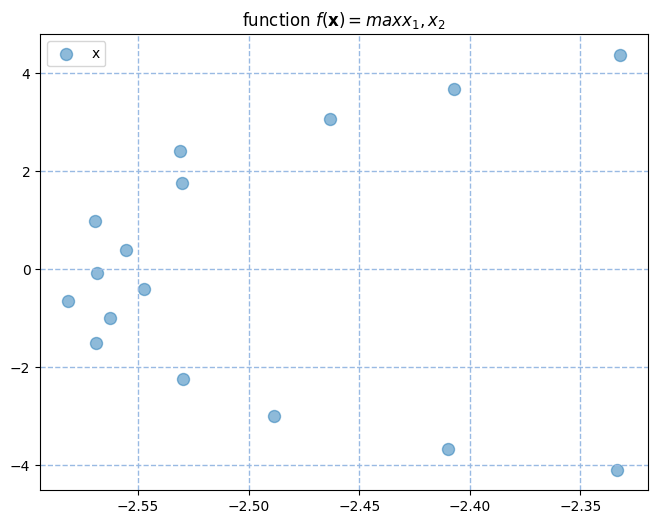

In [ ]:

# Construct the problem.
X = cp.Variable((N,N), PSD  =True) # PSD

objective = cp.Minimize(0)
all_B = [cp.trace(B @ X)  for B in dis_A]

constraints = [all_B[idx] >= dis_f[idx] for idx in range(L)]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve('SCS',use_indirect=True,verbose=True)


X = X.value
U, s, vh = svd(X, full_matrices=True)
x = 10*U[:,0]
y = 10*U[:,1]



plt.axes([0.025, 0.025, 0.95, 0.95])

plt.scatter(x, y, s=75, alpha=.5,)
plt.legend('x')
plt.title('function $f(\mathbf{x}) =max{x_1,x_2}$')
plt.grid(color=(0.6, 0.73, 0.89),linestyle='--', linewidth=1)
plt.show()
plt.savefig('Summation',format='png')
plt.close()
MaxModulation = pd.DataFrame({'Y': y,'X': x})
MaxModulation.set_index('Y')
MaxModulation.to_csv('SymSumModK4Q2.dat',index=False,sep=' ')

Figure $7$ of the paper: Performance comparison between ChannelSum, ChannelComp, AirComp, and OFDMA in terms of NMSE error averaged over $N_s =10000$ Monte Carlo trails. when values of the function to be computed are originally quantized. Such input values are the input value $x_k = \{0,1,\ldots,63\}$ and the desired functions are $f_1 = \frac{1}{K}\sum_{k=1}^{10}x_k$,$f_2 = (\prod_{k=1}^4x_k)^{\frac{1}{K}}$.

# Figure 7 (b) Geometric mean

<ipython-input-33-187483787616>:31: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  Rf[idx] = func_sum(Df[idx])
<ipython-input-33-187483787616>:133: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  f3 = func_sum(f3)


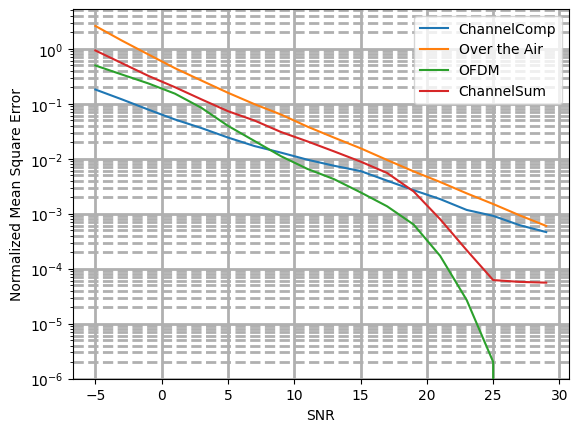

In [ ]:
# Function = summation
q = 3 # number of bits
K = 4 # number of users

def func_sum(ran):
  return  np.product(ran)

def EncoderSum(x):
  cx =step*x
  return np.array([idx-C*np.floor(idx/C) + 1j*(np.floor(idx/C))   for idx in cx])

ModVec = np.array([3.4098 - 4.1264j, 0.2021 - 2.7743j,-1.3992 - 1.4617j,-2.7764 - 0.3204j, -2.6599 + 0.7654j,-1.6303 + 1.7480j,0.5336 + 2.6582j,4.3184 + 3.5113j]).astype(complex)

MeanVec = np.mean(ModVec)
ModVec = ModVec - MeanVec

Q = 2**q
M = Q**K
N = Q*K
C = Q
T = M # number of tested samples
Iter = 10000

r = [1+n for n in range(Q)]


Df = [ele for ele in product(r, repeat = K)]

Rf = np.zeros(M)
for idx in range(M):
  Rf[idx] = func_sum(Df[idx])

# Quantized domian
step = 2*Q

P1 = norm(ModVec)
P1 = P1/q
rv = r - np.mean(r)
P2 = norm(np.log2(r))
P2 = P2/q
P3 = P1
# QAM power
d1 = 0.5
d2 = 0.5

P4 =  (Q**2-1)/6 # norm(EncoderSum(np.log2(r))) #
P4 = P4/q






def EncoderComp(x):
  return  np.array([ModVec[idx-1] for idx in x])

def EncoderOFDMA(x):
  return  np.array([ModVec[idx-1] for idx in x])

Tab = np.zeros(M,dtype=np.complex_)
for idx in range(M):
  temp = EncoderComp(Df[idx])
  Tab[idx] = np.sum(temp)


# Channel Comp decoder

def DecoderOFDMA(array, value):
    array = np.asarray(array)

    idx = (np.abs(array - value)).argmin()
    # return array[idx]
    return idx + 1

def DecoderComp(array, value):
    array = np.asarray(array)
    #idx = (np.abs(array - value)).argmin()
    return (np.abs(array - value)).argmin()

# Channel Sum decoder

def DecoderSum(value):
    dim1 = np.round(np.real(value))
    if dim1 >= K*(C-1): dim1 = K*(C-1)
    if dim1 <=0: dim1 = 0

    dim2 = np.round(np.imag(value))

    if dim2 >= K*(C-1): dim2 =K*(C-1)
    if dim2 <= 0: dim2 = 0

    return (dim1 + dim2*C)/step



MSE1 = []
MSE2 = []
MSE3 = []
MSE4 = []
SNR = [2*n -5 for n in range(18)]
for snr in SNR:
  mse1 = 0
  mse2 = 0
  mse3 = 0
  mse4 = 0
  for idt in range(Iter):
    Df = random.sample(r, K)
    # ChannelComp
    x1 = EncoderComp(Df)
    # Analog
    x2 = np.log2(Df)
    # OFDMA
    x3 = EncoderOFDMA(Df)
    # ChannelSum
    x4 = EncoderSum(np.log2(Df))
    sigma1  = P1*10 **(-snr / 20)
    sigma2  = P2*10 **(-snr / 20)
    sigma3  = P3*10 **(-snr / 20)
    sigma4  = P4*10 **(-snr / 20)
    noise1 = np.random.normal(0, sigma1, 1)*(1+1j)/np.sqrt(2)
    noise2 = np.random.normal(0, sigma2, 1)
    noise4 = np.random.normal(0, sigma4, 1)*(1+1j)/np.sqrt(2)
    y1 = np.sum(x1) + noise1
    y2 = np.sum(x2) + noise2
    y4 = np.sum(x4) + noise4
    f3  = []
    for idy in range(K):
        nosie3 = np.random.normal(0, sigma3, 1)*(1+1j)/np.sqrt(2)
        y3 = x3[idy] + nosie3
        f3.append(DecoderOFDMA(ModVec, y3))

    # decoding
    f3 = func_sum(f3)
    ind_min = DecoderComp(Tab, y1)
    f1 = Rf[ind_min]
    f2 = 2**(y2)
    f4 = 2**(DecoderSum(y4))
    f4 = np.round(f4)
    f = np.prod(Df)

    f1 = f1**(1/K)
    f2 = f2**(1/K)
    f3 = f3**(1/K)
    f4 = f4**(1/K)
    f = f**(1/K)
    mse1 = mse1 +  (np.abs(f1-f)**2)/np.abs(f)
    mse2 = mse2 +  (np.abs(f2[0]-f)**2)/np.abs(f)
    mse3 = mse3 +  (np.abs(f3-f)**2)/np.abs(f)
    mse4 = mse4 +  (np.abs(f4-f)**2)/np.abs(f)
  MSE1.append(mse1/Iter)
  MSE2.append(mse2/Iter)
  MSE3.append(mse3/Iter)
  MSE4.append(mse4/Iter)



plt.figure(2)

plt.plot(SNR,MSE1,SNR,MSE2,SNR,MSE3,SNR,MSE4)
# plt.ylim(1e-3, 1e+2)
plt.xlabel('SNR')
plt.ylabel('Normalized Mean Square Error')
plt.yscale("log")
plt.legend(['ChannelComp','Over the Air','OFDM','ChannelSum'])
plt.grid( linestyle='-', which='major',linewidth=2)
plt.grid( linestyle='--', which='minor',linewidth=2)
plt.show()
MSEChannel = pd.DataFrame({'SNR': SNR,'ChannelComp': MSE1,'OAT': MSE2,'OFDM': MSE3,'ChannelSum': MSE4})
MSEChannel.set_index('SNR')
MSEChannel.to_csv('MSEQuantizedProd.dat',index=False,sep=' ')

Figure $7$ of the paper: Performance comparison between ChannelSum, ChannelComp, AirComp, and OFDMA in terms of NMSE error averaged over $N_s =100$ Monte Carlo trails. when values of the function to be computed are originally quantized. Such input values are the input value $x_k = \{0,1,\ldots,15\}$ and the desired functions are $f_1 = \sum_{k=1}^4x_k$.

# Figure 7 (a) Arithmatic Mean

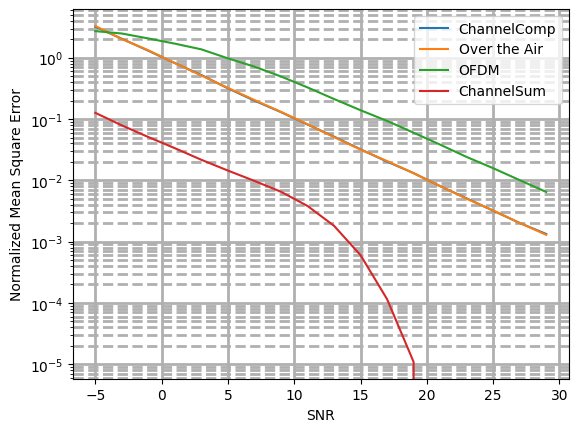

In [ ]:
# Function = summation
q = 6 # number of bits

K =10 # number of users
def func_sum(ran):
  return  np.sum(ran)

def EncoderSum(x):
  return np.array([idx-C*np.floor(idx/C) + 1j*(np.floor(idx/C))   for idx in x])

Q = 2**q
C = int(np.sqrt(Q))
Iter = 10000 # number of tested samples

ModVec = [1+n for n in range(Q)]
MeanVec = np.mean(ModVec)

ModVec = ModVec - MeanVec


r = [1+n for n in range(Q)]






# Quantized domian
P1 = (Q**2-1)/12 #norm(rv) PAM formula (Q**2-1)d**2/3 : Meghdadi, Vahid. "BER calculation." Wireless Communications (2008).
P1 = P1/q
P2 = (Q**2-1)/12  #norm(rv) PAM formula (Q**2-1)d**2/3 : Meghdadi, Vahid. "BER calculation." Wireless Communications (2008).
P2 = P2/q
P3 = P1


# QAM power
d1 = 0.5
d2 = 0.5
P4 = (Q-1)/6 # QAM power normalaized one  : Meghdadi, Vahid. "BER calculation." Wireless Communications (2008).
P4 = P4/q






def EncoderComp(x):
  return  np.array([ModVec[idx-1] for idx in x])

def EncoderOFDMA(x):
  return  np.array([ModVec[idx-1] for idx in x])

# Tab = np.zeros(M,dtype=np.complex_)
# for idx in range(M):
#   temp = EncoderComp(Df[idx])
#   Tab[idx] = np.sum(temp)


# Channel Comp decoder

def DecoderOFDMA(array, value):
    array = np.asarray(array)

    idx = (np.abs(array - value)).argmin()
    # return array[idx]
    return idx + 1

def DecoderComp(array, value):
    array = np.asarray(array)
    #idx = (np.abs(array - value)).argmin()
    return (np.abs(array - value)).argmin()

# Channel Sum decoder

def DecoderSum(value):
    dim1 = np.round(np.real(value))
    if dim1 >= K*(C-1): dim1 = K*(C-1)
    if dim1 <=0: dim1 = 0

    dim2 = np.round(np.imag(value))

    if dim2 >= K*(C-1): dim2 =K*(C-1)
    if dim2 <= 0: dim2 = 0

    return dim1 + dim2*C



MSE1 = []
MSE2 = []
MSE3 = []
MSE4 = []
SNR = [2*n -5 for n in range(18)]
for snr in SNR:
  mse1 = 0
  mse2 = 0
  mse3 = 0
  mse4 = 0
  for idt in range(Iter):
    Df = random.sample(r, K)
    # ChannelComp
    x1 = EncoderComp(Df)
    # Analog
    x2 = Df
    # OFDMA
    x3 = EncoderOFDMA(Df)
    # ChannelSum
    x4 = EncoderSum(Df)
    sigma1  = P1*10 **(-snr / 20)
    sigma2  = P2*10 **(-snr / 20)
    sigma3  = P3*10 **(-snr / 20)
    sigma4  = P4*10 **(-snr / 20)
    noise1 = np.random.normal(0, sigma1, 1)
    noise2 = np.random.normal(0, sigma2, 1)
    noise4 = np.random.normal(0, sigma4, 1)*(1+1j)/np.sqrt(2)
    y1 = np.sum(x1) + noise1
    y2 = np.sum(x2) + noise2

    f3  = []
    for idy in range(K):
        nosie3 = np.random.normal(0, sigma3, 1)*(1+1j)/np.sqrt(2)
        y3 = x3[idy] + nosie3
        f3.append(DecoderOFDMA(ModVec, y3))
    y4 = np.sum(x4) + noise4
    # decoding
    f3 = func_sum(f3)
    f1 = np.round(np.real(y1)) + MeanVec*K
    f2 = y2
    f4 = DecoderSum(y4)
    #
    f = np.sum(Df)


    f1 = f1/K
    f2 = f2/K
    f3 = f3/K
    f4 = f4/K
    f = f/K


    mse1 = mse1 +  (np.abs(f1[0]-f)**2)/np.abs(f)
    mse2 = mse2 + (np.abs(f2[0]-f)**2)/np.abs(f)
    mse3 = mse3 +  (np.abs(f3-f)**2)/np.abs(f)
    mse4 = mse4 +  (np.abs(f4[0]-f)**2)/np.abs(f)
  MSE1.append(mse1/Iter)
  MSE2.append(mse2/Iter)
  MSE3.append(mse3/Iter)
  MSE4.append(mse4/Iter)



plt.figure(2)

plt.plot(SNR,MSE1,SNR,MSE2,SNR,MSE3,SNR,MSE4)
# plt.plot(SNR,MSE4)
# plt.ylim(1e-3, 1e+2)

plt.xlabel('SNR')
plt.ylabel('Normalized Mean Square Error')
plt.yscale("log")
plt.legend(['ChannelComp','Over the Air','OFDM','ChannelSum'])

plt.grid( linestyle='-', which='major',linewidth=2)
plt.grid( linestyle='--', which='minor',linewidth=2)
plt.show()

MSEChannel = pd.DataFrame({'SNR': SNR,'ChannelComp': MSE1,'OAT': MSE2,'OFDM': MSE3,'ChannelSum': MSE4})
MSEChannel.set_index('SNR')

MSEChannel.to_csv('MSESUM.dat',index=False,sep=' ')

## Computational Complexity:
the computational complexity to find a valid modulation vector in ChannelComp is $\mathcal{O}(\sqrt{K}q^{8K+0.5})$. Every operation happens only per input value which involves around $4$ operation, i.e., $\mathcal{O}(1)$.
Here, we compute it for the summaiton function. which it truns out to be $\mathcal{O}(K^8q^{8.5})$


# Figure 8 (a) and (c)

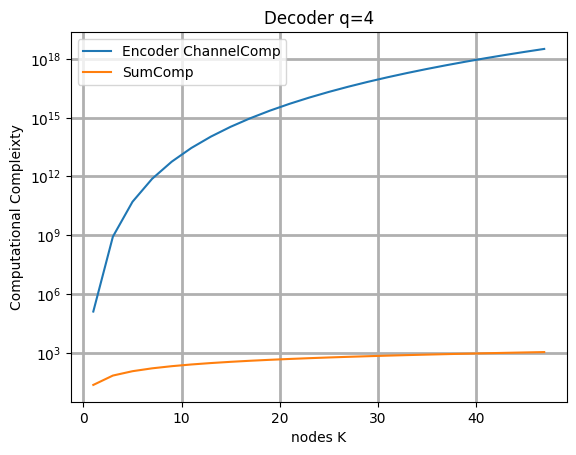

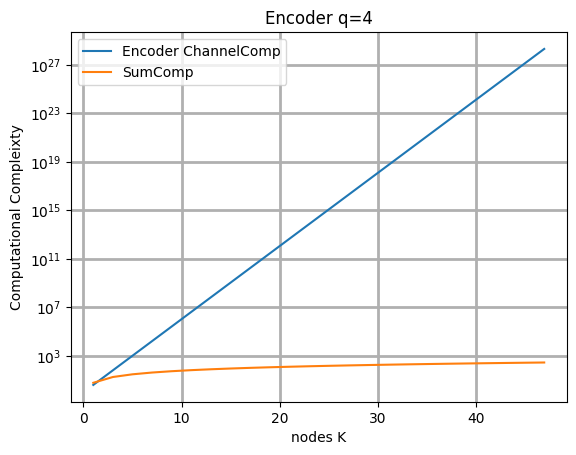

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

K = 24
q = 4
# Diffrent nodes
Km = [2*n+1 for n in range(K)]


# m = q**5*k**2
# Order of ChannelComp is O(K^3q^{2K+3}})
# CComp = [(k**3)*q**(2*k+3) for k in Km]

EChannelComp = [q**8.5*k**8  for k in Km]
ESumComp = [6*k*q for k in Km]

DChannelComp = [q**k  for k in Km]
DSumComp = [6*k for k in Km]

plt.figure(3)

plt.plot(Km,EChannelComp,Km,ESumComp)
# plt.ylim(1e-3, 1e+2)
plt.yscale("log")
plt.title("Decoder q=4")
plt.xlabel('nodes K')
plt.ylabel('Computational Compleixty')
plt.legend(['Encoder ChannelComp','SumComp'])

plt.grid( linestyle='-', which='major',linewidth=2)
plt.grid( linestyle='--', which='minor',linewidth=2)
plt.show()

plt.plot(Km,DChannelComp,Km,DSumComp)
# plt.ylim(1e-3, 1e+2)
plt.yscale("log")
plt.title("Encoder q=4")
plt.xlabel('nodes K')
plt.ylabel('Computational Compleixty')
plt.legend(['Encoder ChannelComp','SumComp'])

plt.grid( linestyle='-', which='major',linewidth=2)
plt.grid( linestyle='--', which='minor',linewidth=2)
plt.show()



MSEChannel = pd.DataFrame({'K': Km,'EncodeChannelComp': EChannelComp,'EncodeSumComp': ESumComp,'DecodeChannelComp': DChannelComp,'DecodeSumComp': DSumComp })
MSEChannel.set_index('K')

MSEChannel.to_csv('Complexity.dat',index=False,sep=' ')

# Figure 8 (b) and (d)  

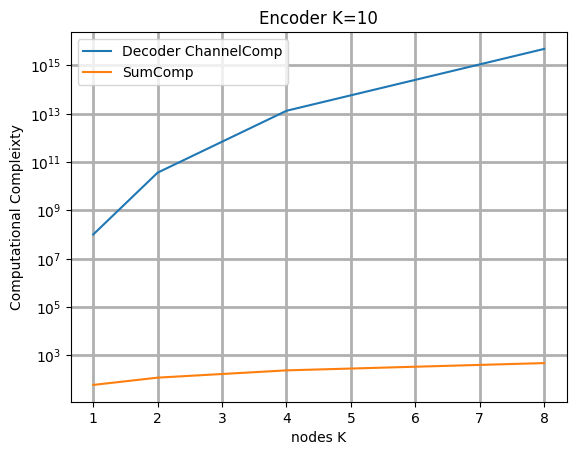

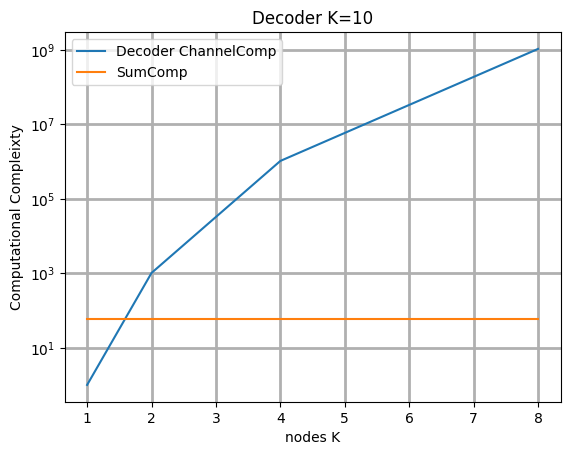

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
K = 10
Q = 4
# Diffrent nodes
Qm = [2**n for n in range(Q)]


# m = q**5*k**2
# Order of ChannelComp is O(K^3q^{2K+3}})
# CComp = [(k**3)*q**(2*k+3) for k in Km]

EChannelComp = [q**8.5*K**8  for q in Qm]
ESumComp = [6*K*q for q in Qm]

DChannelComp = [q**K  for q in Qm]
DSumComp = [6*K for q in Qm]

plt.figure(1)

plt.plot(Qm,EChannelComp,Qm,ESumComp)
# plt.ylim(1e-3, 1e+2)
plt.yscale("log")
plt.xlabel('nodes K')
plt.title("Encoder K=10")
plt.ylabel('Computational Compleixty')
plt.legend(['Decoder ChannelComp','SumComp'])

plt.grid( linestyle='-', which='major',linewidth=2)
plt.grid( linestyle='--', which='minor',linewidth=2)
plt.show()

plt.figure(2)

plt.plot(Qm,DChannelComp,Qm,DSumComp)
# plt.ylim(1e-3, 1e+2)
plt.yscale("log")
plt.xlabel('nodes K')
plt.title("Decoder K=10")
plt.ylabel('Computational Compleixty')
plt.legend(['Decoder ChannelComp','SumComp'])

plt.grid( linestyle='-', which='major',linewidth=2)
plt.grid( linestyle='--', which='minor',linewidth=2)
plt.show()




MSEChannel = pd.DataFrame({'q': Qm,'EncodeChannelComp': EChannelComp,'EncodeSumComp': ESumComp,'DecodeChannelComp': DChannelComp,'DecodeSumComp': DSumComp })
MSEChannel.set_index('q')

MSEChannel.to_csv('Complexity2.dat',index=False,sep=' ')

# MSE Error for QAM Figure 5 (a)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ndtr
import pandas as pd

def encoder(g, q2):
    L = len(g)
    z = np.zeros((2, L))
    for idx in range(L):
        z[0, idx] = g[idx] - q2 * np.floor(g[idx] / q2)
        z[1, idx] = np.floor(g[idx] / q2)
    return z


<ipython-input-65-76a7754c4bdb>:124: RuntimeWarning: divide by zero encountered in log10
  plt.plot(SNR_db, 10 * np.log10(MSES1[:]), '^')  # convert MSE to dB scale for plot
<ipython-input-65-76a7754c4bdb>:125: RuntimeWarning: divide by zero encountered in log10
  plt.plot(SNR_db, 10 * np.log10(MSET1[:]), '^-')  # convert MSE to dB scale for plot
<ipython-input-65-76a7754c4bdb>:127: RuntimeWarning: divide by zero encountered in log10
  plt.plot(SNR_db, 10 * np.log10(MSES2[:]), '<')  # convert MSE to dB scale for plot
<ipython-input-65-76a7754c4bdb>:128: RuntimeWarning: divide by zero encountered in log10
  plt.plot(SNR_db, 10 * np.log10(MSET2[:]), '<-')  # convert MSE to dB scale for plot
<ipython-input-65-76a7754c4bdb>:130: RuntimeWarning: divide by zero encountered in log10
  plt.plot(SNR_db, 10 * np.log10(MSES3[:]), '>')  # convert MSE to dB scale for plot
<ipython-input-65-76a7754c4bdb>:131: RuntimeWarning: divide by zero encountered in log10
  plt.plot(SNR_db, 10 * np.log10(MSET3[

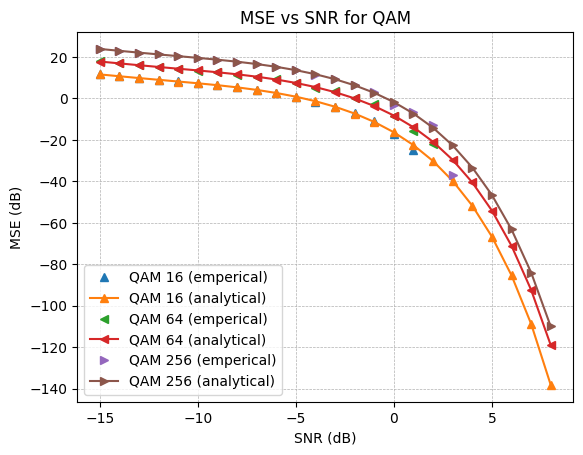

In [ ]:
# Define constants
Q1 = 16  # sample value for q
Q2 = 64  # sample value for q
Q3 = 256  # sample value for q
q1 = int(np.sqrt(Q1))  # sample value for q2
q2 = int(np.sqrt(Q2))  # sample value for q2
q3 = int(np.sqrt(Q3))  # sample value for q2



Repeat = 10000 #100000

# Define SNR range in dB
SNR_db = np.arange(-15, 20, 1)  # range from -15 dB to 20 dB

# Define K range
K = 100

# Initialize MSE array
MSET1 = np.zeros(len(SNR_db))
MSET2 = np.zeros(len(SNR_db))
MSET3 = np.zeros(len(SNR_db))

MSES1 = np.zeros(len(SNR_db))
MSES2 = np.zeros(len(SNR_db))
MSES3 = np.zeros(len(SNR_db))


# QAM power normalaized one  : Meghdadi, Vahid. "BER calculation." Wireless Communications (2008).

P1 = (Q1-1)/6
P2 = (Q2-1)/6
P3 = (Q3-1)/6

# Average over bits and nodes

P1 =P1/Q1
P2 =P2/Q2
P3 =P3/Q3

# Calculate M1, M2, d1, d2
M1 = K * (q1 - 1) + 1
M2 = K * (q2 - 1) + 1
M3 = K * (q3 - 1) + 1

d1 = abs(1) /2

nCount = 0
for snr in SNR_db:
    sigma1 = P1*10 **(-snr / 20)  # convert SNR to sigma
    sigma2 = P2*10 **(-snr / 20)  # convert SNR to sigma
    sigma3 = P3*10 **(-snr / 20)  # convert SNR to sigma
    #---------------------
    # Emprical bound
    #---------------------
    e1 = 0
    e2 = 0
    e3 = 0
    for it in range(Repeat):

        n1 = np.random.randn(2) * sigma1
        n2 = np.random.randn(2) * sigma2
        n3 = np.random.randn(2) * sigma3

        X1 = np.random.randint(q1, size=K) + 1
        X2 = np.random.randint(q2, size=K) + 1
        X3 = np.random.randint(q3, size=K) + 1

        Y1 = encoder(X1, q1)  # encoder
        Y2 = encoder(X2, q2)  # encoder
        Y3 = encoder(X3, q3)  # encoder

        Y1 = Y1.sum(axis=1)
        Y2 = Y2.sum(axis=1)
        Y3 = Y3.sum(axis=1)

        W1 = Y1 + n1
        W2 = Y2 + n2
        W3 = Y3 + n3

        y1 = X1.sum()
        y2 = X2.sum()
        y3 = X3.sum()


        yhat1 = round(W1[0]) + round(W1[1]) * q1  # decoder
        yhat2 = round(W2[0]) + round(W2[1]) * q2  # decoder
        yhat3 = round(W3[0]) + round(W3[1]) * q3  # decoder
        e1 = abs(y1 - yhat1) ** 2 + e1
        e2 = abs(y2 - yhat2) ** 2 + e2
        e3 = abs(y3 - yhat3) ** 2 + e3

    MSES1[nCount] = e1 / Repeat
    MSES2[nCount] = e2 / Repeat
    MSES3[nCount] = e3 / Repeat



    #---------------------
    # Theoretical bound
    #---------------------

    er1 = 0
    for i in range(1, M1):
        er1 += (2*i-1 + (3*i*(1-i)-1)/M1) * (1 - ndtr((2 * i - 1) * d1 / sigma1))
    MSET1[nCount] =2*(Q1+1)*er1

    er2 = 0
    for i in range(1, M2):
        er2 += (2*i-1 + (3*i*(1-i)-1)/M2) * (1 - ndtr((2 * i - 1) * d1 / sigma2))
    MSET2[nCount] =2*(Q2+1)*er2

    er3 = 0
    for i in range(1, M3):
        er3 += (2*i-1 + (3*i*(1-i)-1)/M3) * (1 - ndtr((2 * i - 1) * d1 / sigma3))
    MSET3[nCount] =2*(Q3+1)*er3

    nCount = nCount + 1


# Plot MSE vs SNR for each K
plt.figure()

plt.plot(SNR_db, 10 * np.log10(MSES1[:]), '^')  # convert MSE to dB scale for plot
plt.plot(SNR_db, 10 * np.log10(MSET1[:]), '^-')  # convert MSE to dB scale for plot

plt.plot(SNR_db, 10 * np.log10(MSES2[:]), '<')  # convert MSE to dB scale for plot
plt.plot(SNR_db, 10 * np.log10(MSET2[:]), '<-')  # convert MSE to dB scale for plot

plt.plot(SNR_db, 10 * np.log10(MSES3[:]), '>')  # convert MSE to dB scale for plot
plt.plot(SNR_db, 10 * np.log10(MSET3[:]), '>-')  # convert MSE to dB scale for plot

plt.xlabel('SNR (dB)')
plt.ylabel('MSE (dB)')
# plt.axis([-15, 20, -30, 30])
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.title('MSE vs SNR for QAM')
plt.legend(['QAM 16 (emperical)','QAM 16 (analytical)','QAM 64 (emperical)','QAM 64 (analytical)','QAM 256 (emperical)','QAM 256 (analytical)'])
plt.show()

MSEChannel = pd.DataFrame({'SNR': SNR_db,'MSES1': MSES1,'MSET1': MSET1,'MSES2': MSES2,'MSET2': MSET2,'MSES3': MSES3,'MSET3': MSET3})
MSEChannel.set_index('SNR')

MSEChannel.to_csv('MSEQAM.dat',index=False,sep=' ')

# MSE Error for PAM Figure 5 (b)

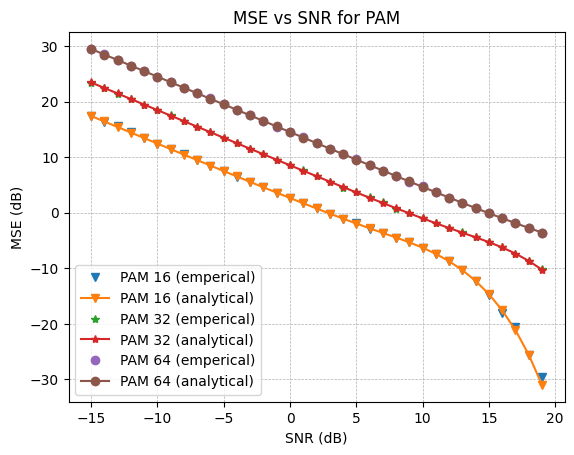

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ndtr
import pandas as pd

# Define constants PAM
Q1 = 16  # sample value for q
Q2 = 32  # sample value for q
Q3 = 64  # sample value for q



Repeat = 10000 #10000

# Define SNR range in dB
SNR_db = np.arange(-15, 20, 1)  # range from -15 dB to 20 dB

# Define K range
K = 100

# Initialize MSE array
MSET1 = np.zeros(len(SNR_db))
MSET2 = np.zeros(len(SNR_db))
MSET3 = np.zeros(len(SNR_db))

MSES1 = np.zeros(len(SNR_db))
MSES2 = np.zeros(len(SNR_db))
MSES3 = np.zeros(len(SNR_db))



# PAM power d^2(Q^2-1)/3 for d = 0.5  : Meghdadi, Vahid. "BER calculation." Wireless Communications (2008).

P1 = (Q1**2-1)/12
P2 = (Q2**2-1)/12
P3 = (Q3**2-1)/12

# Average over bits

P1 = P1/Q1
P2 = P2/Q2
P3 = P3/Q3



# Calculate M1, M2, d1, d2
M1 = K * (Q1 - 1) + 1
M2 = K * (Q2 - 1) + 1
M3 = K * (Q3 - 1) + 1



d1 = abs(1) /2
nCount = 0
for snr in SNR_db:
    sigma1 = P1*10 **(-snr / 20)  # convert SNR to sigma
    sigma2 = P2*10 **(-snr / 20)  # convert SNR to sigma
    sigma3 = P3*10 **(-snr / 20)  # convert SNR to sigma

    #---------------------
    # Emprical bound
    #---------------------
    e1 = 0
    e2 = 0
    e3 = 0
    for it in range(Repeat):
        n1 = np.random.randn(1) * sigma1
        n2 = np.random.randn(1) * sigma2
        n3 = np.random.randn(1) * sigma3

        X1 = np.random.randint(Q1, size=K) + 1
        X2 = np.random.randint(Q2, size=K) + 1
        X3 = np.random.randint(Q3, size=K) + 1


        Y1 = X1.sum(axis=0)
        Y2 = X2.sum(axis=0)
        Y3 = X3.sum(axis=0)
        #
        W1 = Y1 + n1
        W2 = Y2 + n2
        W3 = Y3 + n3

        y1 = X1.sum()
        y2 = X2.sum()
        y3 = X3.sum()
        # Decoding
        yhat1 = round(W1[0])
        yhat2 = round(W2[0])
        yhat3 = round(W3[0])

        e1 = abs(y1 - yhat1) ** 2 + e1
        e2 = abs(y2 - yhat2) ** 2 + e2
        e3 = abs(y3 - yhat3) ** 2 + e3

    MSES1[nCount] = e1 / Repeat
    MSES2[nCount] = e2 / Repeat
    MSES3[nCount] = e3 / Repeat


    #---------------------
    # Theoretical bound
    #---------------------

    er1 = 0
    for i in range(1, M1):
        er1 += 2*(2*i-1 + (3*i*(1-i)-1)/M1) * (1 - ndtr((2 * i - 1) * d1 / sigma1))
    # Calculate MSE
    MSET1[nCount] =er1
    er2 = 0
    for i in range(1, M2):
        er2 += 2*(2*i-1 + (3*i*(1-i)-1)/M2) * (1 - ndtr((2 * i - 1) * d1 / sigma2))
    MSET2[nCount] =er2
    er3 = 0
    for i in range(1, M3):
        er3 += 2*(2*i-1 + (3*i*(1-i)-1)/M3) * (1 - ndtr((2 * i - 1) * d1 / sigma3))
    MSET3[nCount] =er3
    nCount = nCount + 1
# Plot MSE vs SNR for each K
plt.figure()

plt.plot(SNR_db, 10 * np.log10(MSES1[:]), 'v')  # convert MSE to dB scale for plot
plt.plot(SNR_db, 10 * np.log10(MSET1[:]), 'v-')  # convert MSE to dB scale for plot
plt.plot(SNR_db, 10 * np.log10(MSES2[:]), '*')  # convert MSE to dB scale for plot
plt.plot(SNR_db, 10 * np.log10(MSET2[:]), '*-')  # convert MSE to dB scale for plot
plt.plot(SNR_db, 10 * np.log10(MSES3[:]), 'o')  # convert MSE to dB scale for plot
plt.plot(SNR_db, 10 * np.log10(MSET3[:]), 'o-')  # convert MSE to dB scale for plot

plt.xlabel('SNR (dB)')
plt.ylabel('MSE (dB)')
# plt.axis([-15, 20, -0, 30])
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.title('MSE vs SNR for PAM')
plt.legend(['PAM 16 (emperical)','PAM 16 (analytical)','PAM 32 (emperical)','PAM 32 (analytical)','PAM 64 (emperical)','PAM 64 (analytical)'])
plt.show()
MSEChannel = pd.DataFrame({'SNR': SNR_db,'MSES1': MSES1,'MSET1': MSET1,'MSES2': MSES2,'MSET2': MSET2,'MSES3': MSES3,'MSET3': MSET3})
MSEChannel.set_index('SNR')

MSEChannel.to_csv('MSEPAM.dat',index=False,sep=' ')


# MAE for QAM and PAM 64 Figure 6(a)

<ipython-input-66-a20f63804417>:98: RuntimeWarning: divide by zero encountered in log10
  plt.plot(SNR_db, 10 * np.log10(MAES1[:]), '*')  # convert MSE to dB scale for plot
<ipython-input-66-a20f63804417>:99: RuntimeWarning: divide by zero encountered in log10
  plt.plot(SNR_db, 10 * np.log10(MAET1[:]), '*-')  # convert MSE to dB scale for plot


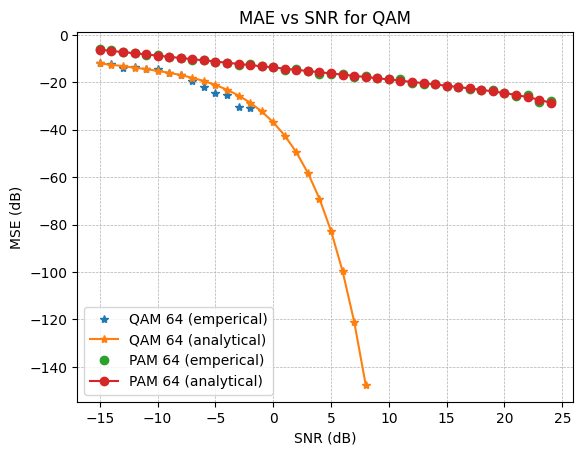

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ndtr

# Define constants
Q = 64  # sample value for q
q = int(np.sqrt(Q))  # sample value for q2



Repeat = 10000 #100000

# Define SNR range in dB
SNR_db = np.arange(-15, 25, 1)  # range from -15 dB to 20 dB
# SNR = 10 ** (SNR_db / 10)  # convert from dB to linear scale
# Define K range
K = 100

# Initialize MSE array
MAET1 = np.zeros(len(SNR_db))
MAES1 = np.zeros(len(SNR_db))

MAET2 = np.zeros(len(SNR_db))
MAES2 = np.zeros(len(SNR_db))

P1 = (Q-1)/6
P2 = (Q**2-1)/12

# Average over bits

P1 = P1/Q
P2 = P2/Q

# Calculate M1, M2, d1, d2
M1 = K * (q - 1) + 1
M2 = K * (Q - 1) + 1
d1 = abs(1) /2


nCount = 0
for snr in SNR_db:
    sigma1 = P1*10 **(-snr / 20)  # convert SNR to sigma
    sigma2 = P2*10 **(-snr / 20)  # convert SNR to sigma


    #---------------------
    # Emprical bound
    #---------------------
    e1 = 0
    e2 = 0
    for it in range(Repeat):
        n1 = np.random.randn(2) * sigma1
        n2 = np.random.randn(1) * sigma2
        X = np.random.randint(Q, size=K) + 1

        # QAM
        Y1 = encoder(X, q)  # encoder
        Y1 = Y1.sum(axis=1)
        W1 = Y1 + n1

        # PAM
        Y2 = X.sum(axis=0)
        W2 = Y2 + n2


        # Estimation
        y = X.sum()

        yhat2 = round(W2[0])
        yhat1 = round(W1[0]) + round(W1[1]) * q  # decoder


        e2 = abs(y - yhat2)/K + e2
        e1 = abs(y - yhat1)/K  + e1

    MAES1[nCount] = e1 / Repeat
    MAES2[nCount] = e2 / Repeat

    #---------------------
    # Theoretical bound
    #---------------------

    er1 = 0
    for i in range(1, M1):
        er1 += 2*(1 + (1 - 2 * i) / M1) * (1 - ndtr((2 * i - 1) * d1 / sigma1))
    er2 = 0
    for i in range(1, M2):
        er2 += 2*(1 + (1 - 2 * i) / M2) * (1 - ndtr((2 * i - 1) * d1 / sigma2))
    # Calculate MSE
    MAET1[nCount] =er1*(1+q)/K
    MAET2[nCount] =er2/K
    nCount = nCount + 1

# Plot MSE vs SNR for each K
plt.figure()

plt.plot(SNR_db, 10 * np.log10(MAES1[:]), '*')  # convert MSE to dB scale for plot
plt.plot(SNR_db, 10 * np.log10(MAET1[:]), '*-')  # convert MSE to dB scale for plot

plt.plot(SNR_db, 10 * np.log10(MAES2[:]), 'o')  # convert MSE to dB scale for plot
plt.plot(SNR_db, 10 * np.log10(MAET2[:]), 'o-')  # convert MSE to dB scale for plot

plt.xlabel('SNR (dB)')
plt.ylabel('MSE (dB)')
# plt.axis([-15, 20, -30, 30])
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.title('MAE vs SNR for QAM')
plt.legend(['QAM 64 (emperical)','QAM 64 (analytical)','PAM 64 (emperical)','PAM 64 (analytical)'])
plt.show()

MSEChannel = pd.DataFrame({'SNR': SNR_db,'MAES1': MAES1,'MAET1': MAET1,'MAES2': MAES2,'MAET2': MAET2})
MSEChannel.set_index('SNR')

MSEChannel.to_csv('MAEMean.dat',index=False,sep=' ')

# MAE for QAM 256 and PAM 64 Figure 6(b) Norm Function

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ndtr

# Define constants
Q1 = 64  # sample value for q
q1 = int(np.sqrt(Q1))  # sample value for q2


Q2 = 256  # sample value for q
q2 = int(np.sqrt(Q2))  # sample value for q2

Repeat = 10000 #100000

# Define SNR range in dB
SNR_db = np.arange(-15, 20, 1)  # range from -15 dB to 20 dB

# Define K range
K = 100
# Saure is holder continous with C


# Initialize MSE array
MAET1 = np.zeros(len(SNR_db))
MAES1 = np.zeros(len(SNR_db))

MAET2 = np.zeros(len(SNR_db))
MAES2 = np.zeros(len(SNR_db))


# Calculate M1, M2, d1, d2
M1 = K * (q1 - 1) + 1
M2 = K * (q2 - 1) + 1
d1 = abs(1) /2


P1 = (Q1-1)/6
P2 = (Q2-1)/6


P1 = P1/Q1
P2 = P2/Q2

# C1 = np.min(P1*10 **(-SNR_db / 20) )/K
# C2 = np.min(P2*10 **(-SNR_db / 20) )/K

nCount = 0
for snr in SNR_db:
    sigma1 = P1*10 **(-snr / 20)  # convert SNR to sigma
    sigma2 = P2*10 **(-snr / 20)  # convert SNR to sigma

    #---------------------
    # Emprical bound
    #---------------------
    e1 = 0
    e2 = 0
    for it in range(Repeat):
        n1 = np.random.randn(2) * sigma1
        n2 = np.random.randn(2) * sigma2
        X1 = np.random.randint(q1, size=K) + 1
        Xs1 = np.square(X1)
        X2 = np.random.randint(q2, size=K) + 1
        Xs2= np.square(X2)
        # QAM 64

        Y1 = encoder(Xs1, q1)  # encoder
        Y1 = Y1.sum(axis=1)
        W1 = Y1 + n1

        # PAM 256
        Y2 = encoder(np.square(X2), q2)  # encoder
        Y2 = Y2.sum(axis=1)
        W2 = Y2 + n2


        # Estimation
        y1 = Xs1.sum()
        y2 = Xs2.sum()

        yhat2 = round(W2[0]) + round(W2[1]) * q2
        yhat2 = yhat2

        yhat1 = round(W1[0]) + round(W1[1]) * q1  # decoder
        yhat1 = yhat1

        e1 = abs(y1 - yhat1)  + e1
        e2 = abs(y2 - yhat2)  + e2

    MAES1[nCount] = e1 / Repeat
    MAES2[nCount] = e2 / Repeat

    #---------------------
    # Theoretical bound
    #---------------------

    er1 = 0
    for i in range(1, M1):
        er1 += 2*(1 + (1 - 2 * i) / M1) * (1 - ndtr((2 * i - 1) * d1 / sigma1))
    er2 = 0
    for i in range(1, M2):
        er2 += 2*(1 + (1 - 2 * i) / M2) * (1 - ndtr((2 * i - 1) * d1 / sigma2))
    # Calculate MSE

    MAET1[nCount] = er1*(1+q1)
    MAET2[nCount] = er2*(1+q2)
    nCount = nCount + 1

# Plot MSE vs SNR for each K
plt.figure()

plt.plot(SNR_db, 10 * np.log10(MAES1[:]), '*')  # convert MSE to dB scale for plot
plt.plot(SNR_db, 10 * np.log10(MAET1[:]), '*-')  # convert MSE to dB scale for plot

plt.plot(SNR_db, 10 * np.log10(MAES2[:]), 'o')  # convert MSE to dB scale for plot
plt.plot(SNR_db, 10 * np.log10(MAET2[:]), 'o-')  # convert MSE to dB scale for plot

plt.xlabel('SNR ')
plt.ylabel('MAE (dB)')
# plt.axis([-15, 20, -30, 30])
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.title('MAE vs SNR for QAM')
plt.legend(['QAM 64 (emperical)','QAM 64 (analytical)','QAM 256 (emperical)','QAM 256 (analytical)'])
plt.show()

MSEChannel = pd.DataFrame({'SNR': SNR_db,'MAES1': MAES1,'MAET1': MAET1,'MAES2': MAES2,'MAET2': MAET2})
MSEChannel.set_index('SNR')

MSEChannel.to_csv('MAENorm.dat',index=False,sep=' ')